### Decision Trees and Random Forests

# Random Forests in `sklearn`

Random Forests are some of the most widespread classifiers used.  Random forests are an example of an ensemble method, meaning that it relies on aggregating the results of an ensemble of simpler estimators.  Further, it is considered non-parametric.  They are relatively simple to use (very few parameters to set and easy to avoid overfitting).  The key parameter to remember is `n_estimators` - the number of trees to use in the model.  There is also a `RandomForestRegressor` for regression instead of classification.
Also in Random Forests, it is important to restrict the maximum depth of the Decision Tree by using Sklearn's `max_depth` hyperparameter in order to avoid over-fitting the model.  This is a part of regularization of hyperparameters.  Other fine-tuning of hyperparameters include control of growth of Decision Trees via `min_samples_leaf`, `min_samples_split`, `max_leaf_nodes`, `min_impurity_split`, `min_impurity_decrease` among others!

See documentation:  http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Advantages:
- Easy to tune, built-in protection against overfitting, no regularization
- Non-linear
- Built-in interaction effects
- Do not require feature scaling or centering at all

Disadvantages
- Slow
- Black-box
- No "coefficients", we don't know what positively or negatively impacts our outcome

Random Forests can limit instability of the training data 'orientation' by averaging predictions over many trees!

Optimizing Forests:

The only option you really need to know is n_estimators, which indicates how many trees you'd like in your forest.

There are however other options you could play with, if you're interested. One is which algorithm to use for splitting nodes: Gini or Entropy.

### Classification Example using Decision Trees

In [4]:
# Build a decision tree and train a DecisionTreeClassifier ()

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and petal width as our features or inputs
y = iris.target # output 

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Visualize Trained DT

Graphviz is an open source graph visualization software package, available at http://www.graphviz.org

In [7]:
from sklearn.datasets import *
from sklearn import tree
import graphviz

data_dot = tree.export_graphviz(tree_clf, out_file=None,
                         feature_names=iris.feature_names[2:],
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)

graph = graphviz.Source(data_dot)
graph.render("iris") # tree saved to iris.pdf

'iris.pdf'

### Estimating Class Probabilities

In [8]:
# The 5 refers to petal length, the 1.5 refers to petal width in cm
# Probabilities in the array refer to 0/54 samples or 0% setosa, 
# 49/54 samples or 90.7% versicolor, and 5/54 samples or 9.3% virginica

tree_clf.predict_proba([[5,1.5]])


array([[ 0.        ,  0.90740741,  0.09259259]])

In [9]:
# Class with the highest probability score given the feature criteria after the predict () 

tree_clf.predict([[5,1.5]])


array([1])

### Regression Using Decision Trees

In [5]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)



DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Voting Classifier 

In [6]:
# Creating and training a voting classifier in Sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [7]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
        estimators=[('lr', log_clf),('rf', rnd_clf), ('svc', svm_clf)],
        voting='hard')

voting_clf.fit(X, y)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [8]:
# Look at each classifier's accuracy on the test set:

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X, y)
    
    y_pred = clf.predict(X)
    print(clf.__class__.__name__, accuracy_score(y, y_pred))
    
    

LogisticRegression 0.873333333333
RandomForestClassifier 0.993333333333
SVC 0.966666666667
VotingClassifier 0.973333333333


### Out of the Bag Evaluation

Since a predictor never sees the out-of-the-bag instances during training, it can be evaluated in lieu of a cross-validation set and instead of using a `cross_val_score` it uses an `oob_score` as its metric.

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=500,
        bootstrap=True, n_jobs=-1, oob_score=True)


In [10]:
bag_clf.fit(X, y)
bag_clf.oob_score_


0.95999999999999996

According to this oob eval, this BaggingClassifier is likely to achieve 96% accuracy on the test set.

In [11]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X)
accuracy_score(y, y_pred)


0.99333333333333329

We got 99% accuracy on the test set - even better!

Below we get the class probabilities for each training instance.  The array of probabilities states that the first training instance has a 14% chance of belonging to the positive class (and 86% chance of belonging to the negative class).

In [12]:
# oob decision () function for each training instance 

bag_clf.oob_decision_function_

array([[ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.   

### Feature Importance using Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X, y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
y_pred_rf = rnd_clf.predict(X)


In [14]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter='random', max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)


In [15]:
from sklearn.datasets import load_iris
iris = load_iris()

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name, score)
    

sepal length (cm) 0.0952979179801
sepal width (cm) 0.0210320243713
petal length (cm) 0.407222661142
petal width (cm) 0.476447396507


<Container object of 4 artists>

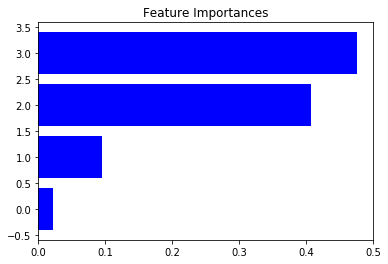

In [25]:
# Most important features

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

features = iris['feature_names']
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')




### Random Forest Example

In [26]:
# Load the data again

from sklearn.datasets import load_iris
data = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)



In [28]:
# Let’s split the data into training and test sets.

X_train, X_test, y_train, y_test = train_test_split(data[iris.feature_names], 
    iris.target, test_size=0.5, stratify=iris.target, random_state=42)


In [29]:
# Now let’s fit a random forest classifier to our training set
# Out-of-the-bag evaluation implemented - an automatic oob evaluation after training

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

Let’s see how well our model performs when classifying our unseen test data. For a random forest classifier, the out-of-bag score computed by sklearn is an estimate of the classification accuracy we might expect to observe on new data. We’ll compare this to the actual score obtained on our test data.

In [30]:
# Evaluate using metrics on the test data set

from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print (f'Out-of-the-bag scoreestimate: {rf.oob_score_:.3}')
print (f'Mean accuracy score: {accuracy:.3}')


Out-of-the-bag scoreestimate: 0.96
Mean accuracy score: 0.893


### Visualize using Confusion Matrix

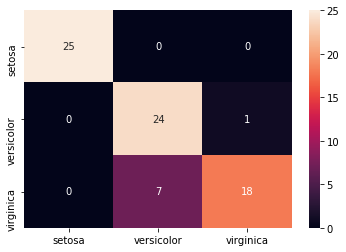

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)
sns.heatmap(cm, annot=True)



This lets us know that our model correctly separates the setosa examples, but exhibits a small amount of confusion when attempting to distinguish between versicolor and virginica.

### Boosting Techniques with AdaBoost 

In [23]:
# AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=1), n_estimators=200,
            algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X, y)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

### Decision Trees, Random Forests, and Gradient Boosting Example Using Wine Dataset

Wine recognition dataset from UC Irvine. This dataset is great for drawing comparisons between algorithms and testing out classification models when learning new techniques.  Great resource:  https://archive.ics.uci.edu/ml/datasets.html.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

In [68]:
# Load the dataset 

filename = '~/Documents/Datasets/winequality-white.csv'
winedata = pd.read_csv(filename, sep=';')
print(winedata.shape)



(4898, 12)


In [70]:
winedata.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [71]:
winedata.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [72]:
winedata.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [73]:
winedata['quality'].unique()


array([6, 5, 7, 8, 4, 3, 9])

In [74]:
winedata['quality'].describe()


count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [11]:
winedata['quality'].value_counts()


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

### Data Cleaning and Preprocessing / Exploration

In [75]:
# Check for missing values
# Proportion of missing values per feature

winedata.isnull().sum()/winedata.shape[0]


fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [76]:
# If quality of wine is greater than or equal to 7 make it class 1 otherwise class 0
# Create binary feature

def isTasty(quality):
    if quality >= 7:
        return 1
    else:
        return 0
    

In [77]:
winedata['tasty'] = winedata['quality'].apply(isTasty)


In [78]:
winedata.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'tasty'],
      dtype='object')

In [16]:
winedata['tasty'].unique()


array([0, 1])

In [79]:
winedata['tasty'].value_counts()


0    3838
1    1060
Name: tasty, dtype: int64

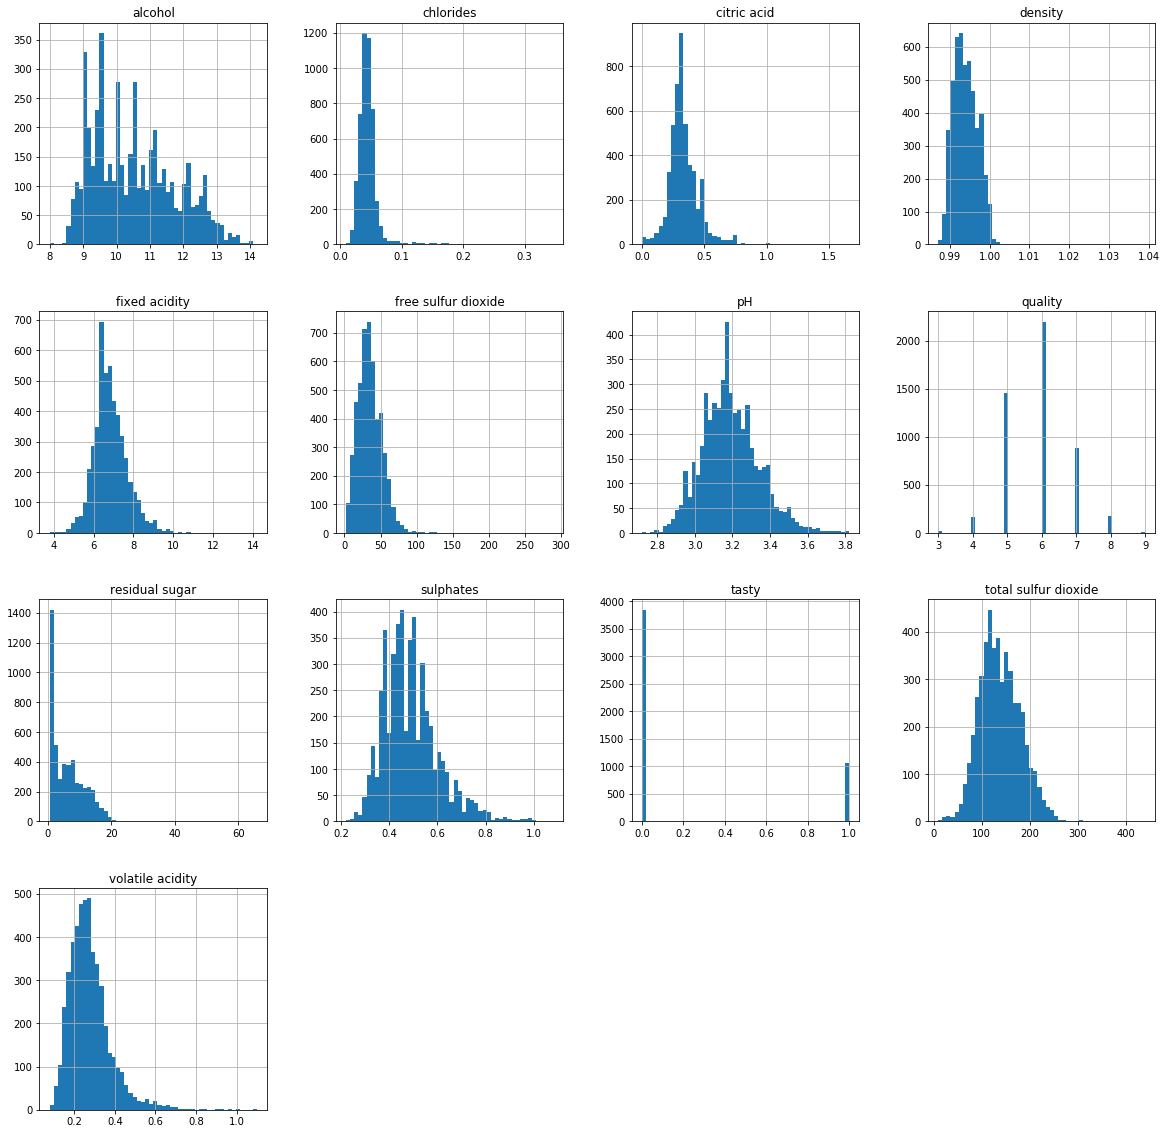

In [80]:
# Looking at the distribution of the dataset features

%matplotlib inline 
winedata.hist(bins = 50, figsize = (20,20))
plt.show()


### Creating a Training and Test Split

In [81]:
# X is our features, target or y is our tasty classification

features = winedata[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
target = winedata['tasty']


In [82]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.33, random_state=42)


In [83]:
[subset.shape for subset in [features_train,features_test,target_train,target_test]]


[(3281, 11), (1617, 11), (3281,), (1617,)]

### Visualize DT for Wine

In [84]:
from sklearn.datasets import *
from sklearn import tree
import graphviz

wine = load_wine()
clf = tree.DecisionTreeClassifier() # init the tree
clf = clf.fit(wine.data, wine.target) # train the tree
# export the learned decision tree
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=wine.feature_names,
                         class_names=wine.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("wine") # tree saved to wine.pdf


'wine.pdf'

### Training our Classifiers

Now we'll use our split population of train and test data to train some classifiers. Today we'll be using a simple decision tree, a Gradient-Boosting Classifier, and a Random Forest Classifier.  For all classifiers that we'll be using, we'll hold the max tree depth at 5. This prevents over-fitting of individual trees.

In [85]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt.fit(features_train,target_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [86]:
gbm = GradientBoostingClassifier(max_depth=5)
gbm.fit(features_train,target_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [87]:
rfm = RandomForestClassifier(criterion='entropy',max_depth=5)
rfm.fit(features_train,target_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Note - use something like MSE for criterion with RandomForestRegressor.

Note - using either Entropy or Gini does not make a huge difference for measuring purity.

### Metrics used Include Precision, Recall, F1 score

Now that the classifiers are trained, let's evaluate their performance. We can call the precision_recall_fscore_support function from sklearn.metrics.

In [88]:
dtperformance = precision_recall_fscore_support(target_test, dt.predict(features_test))

gbperformance = precision_recall_fscore_support(target_test, gbm.predict(features_test))

rfperformance = precision_recall_fscore_support(target_test, rfm.predict(features_test))


In [89]:
dtperformance

(array([ 0.85714286,  0.53799392]),
 array([ 0.87898089,  0.49030471]),
 array([ 0.86792453,  0.51304348]),
 array([1256,  361]))

In [90]:
gbperformance

(array([ 0.87073348,  0.7625    ]),
 array([ 0.95461783,  0.50692521]),
 array([ 0.9107482 ,  0.60898502]),
 array([1256,  361]))

In [91]:
rfperformance

(array([ 0.82365003,  0.66883117]),
 array([ 0.9593949 ,  0.28531856]),
 array([ 0.88635528,  0.4       ]),
 array([1256,  361]))

 We're interested in predicting a positive (1) value for "tasty", so we're mostly concerned with the performance of each classifier in predicting the value for that class, which is the second number in each list for each metric (ie, the Decision Tree Classifier found 0.574 Precision for the positive class, and the Random Forest Classifier found .299 Recall for the positive class).

We can see that the Gradient Boosting Classifier (GBC) tree generally out-performs the others in correctly classifying tasty wines. The GBC tree also achieved a higher recall for the positive class than the other classifiers. This all being the case, it is clear that the GBC tree classifier was the strongest performer in the cohort.

In [92]:
print('Precision, Recall, Fscore, and Support for each class in simple decision tree, gradient boosted, and random forest tree classifiers:'+'\n')
for treeMethod in [dtperformance,gbperformance,rfperformance]:
    print('Precision: ',treeMethod[0])
    print('Recall: ',treeMethod[1])
    print('Fscore: ',treeMethod[2])
    print('Support: ',treeMethod[3],'\n')

Precision, Recall, Fscore, and Support for each class in simple decision tree, gradient boosted, and random forest tree classifiers:

Precision:  [ 0.85714286  0.53799392]
Recall:  [ 0.87898089  0.49030471]
Fscore:  [ 0.86792453  0.51304348]
Support:  [1256  361] 

Precision:  [ 0.87073348  0.7625    ]
Recall:  [ 0.95461783  0.50692521]
Fscore:  [ 0.9107482   0.60898502]
Support:  [1256  361] 

Precision:  [ 0.82365003  0.66883117]
Recall:  [ 0.9593949   0.28531856]
Fscore:  [ 0.88635528  0.4       ]
Support:  [1256  361] 



### Confusion Matrix

In [93]:
# Confusion Matrix

print('Confusion Matrix for simple decision tree, gradient boosted, and random forest tree classifiers:')
print('Simple Tree:\n',confusion_matrix(target_test,dt.predict(features_test)),'\n')
print('Gradient Boosted:\n',confusion_matrix(target_test,gbm.predict(features_test)),'\n')
print('Random Forest:\n',confusion_matrix(target_test,rfm.predict(features_test)))


Confusion Matrix for simple decision tree, gradient boosted, and random forest tree classifiers:
Simple Tree:
 [[1104  152]
 [ 184  177]] 

Gradient Boosted:
 [[1199   57]
 [ 178  183]] 

Random Forest:
 [[1205   51]
 [ 258  103]]


### Feature Importance

In [104]:
# Feature Importances


for importance,feature in zip(gbm.feature_importances_,['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']):
    important_features_list = sorted(gbm.feature_importances_,
                                 reverse=True)

print ('Most important features: %s' %important_features_list)


Most important features: [0.14871091115190735, 0.13947771252514773, 0.096716367717926008, 0.09141500256895288, 0.088146389753346224, 0.079299269097935388, 0.078879616203472724, 0.078165560705195813, 0.075289309058323109, 0.065109561983705683, 0.058790299234087164]


In [105]:
print('Feature Importances for GBM\n')
for importance,feature in zip(gbm.feature_importances_,['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']):
    print('{}: {}'.format(feature,importance))
    

Feature Importances for GBM

fixed acidity: 0.058790299234087164
volatile acidity: 0.08814638975334622
citric acid: 0.06510956198370568
residual sugar: 0.07887961620347272
chlorides: 0.07816556070519581
free sulfur dioxide: 0.09141500256895288
total sulfur dioxide: 0.09671636771792601
density: 0.14871091115190735
pH: 0.07528930905832311
sulphates: 0.07929926909793539
alcohol: 0.13947771252514773


### Plot Feature Importances

Feature importances, which are built into Sklearn, are a more standard way to understand decision trees and random forests. They describe how well a given feature splits the population. However, they do not give any insight into the directionality of the feature, i.e., how exactly it affects the response variable or outcome.

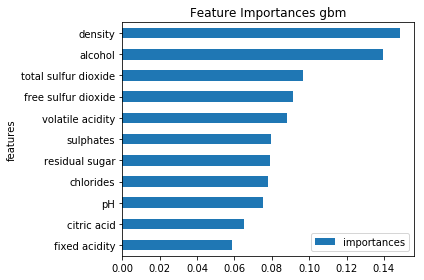

In [106]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

wine_importances = pd.DataFrame({'features': features_train.columns,
                               'importances': gbm.feature_importances_
                              })
wine_importances\
    .set_index('features')\
    .sort_values('importances')\
    .plot(kind='barh')
plt.title('Feature Importances gbm')
plt.tight_layout()


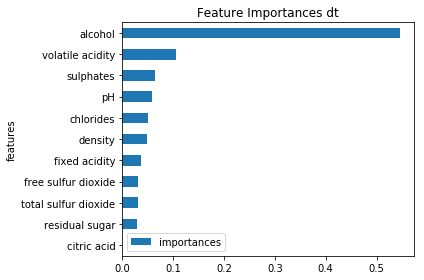

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

wine_importances = pd.DataFrame({'features': features_train.columns,
                               'importances': dt.feature_importances_
                              })
wine_importances\
    .set_index('features')\
    .sort_values('importances')\
    .plot(kind='barh')
plt.title('Feature Importances dt')
plt.tight_layout()


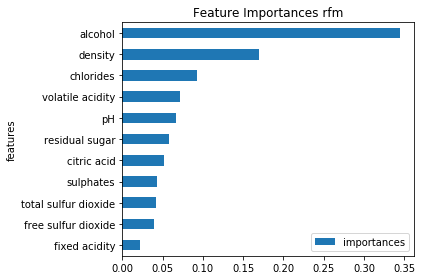

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

wine_importances = pd.DataFrame({'features': features_train.columns,
                               'importances': rfm.feature_importances_
                              })
wine_importances\
    .set_index('features')\
    .sort_values('importances')\
    .plot(kind='barh')
plt.title('Feature Importances rfm')
plt.tight_layout()


### Example using Random Forest using Kaggle Titanic Dataset

The example below will include the typical Data Science workflow:  Import libraries and import dataset, data exploration/bivariate analyses (EDA), data preprocessing/cleaning, visualization/feature engineering, building Machine Learning models - special implementation of a Random Forest algorithm - looking at feature importance, hyperparameter tuning, further evaluation using a confusion matrix, ROC AUC Curve and score.  

In [1]:
# Linear algebra and preprocessing of data
import numpy as np
import pandas as pd

# Visualization tools
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


In [3]:
# Load the train dataset 

filename = '~/Documents/Datasets/train.csv'
train_df = pd.read_csv(filename)
print(train_df.shape)


(891, 12)


In [4]:
# Load the test dataset

filename = '~/Documents/Datasets/test.csv'
test_df = pd.read_csv(filename)
print(test_df.shape)


(418, 11)


In [5]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
train_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Check for missing values
# Proportion of missing values per feature

train_df.isnull().sum()/train_df.shape[0]


PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [8]:
# Another way to look at missing values

total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)


,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [32]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

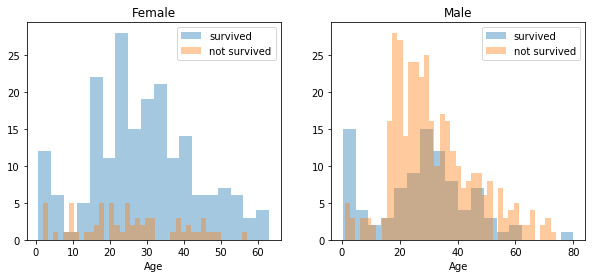

In [9]:
# Plot Age and Sex against target Survived
# Distplot

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')


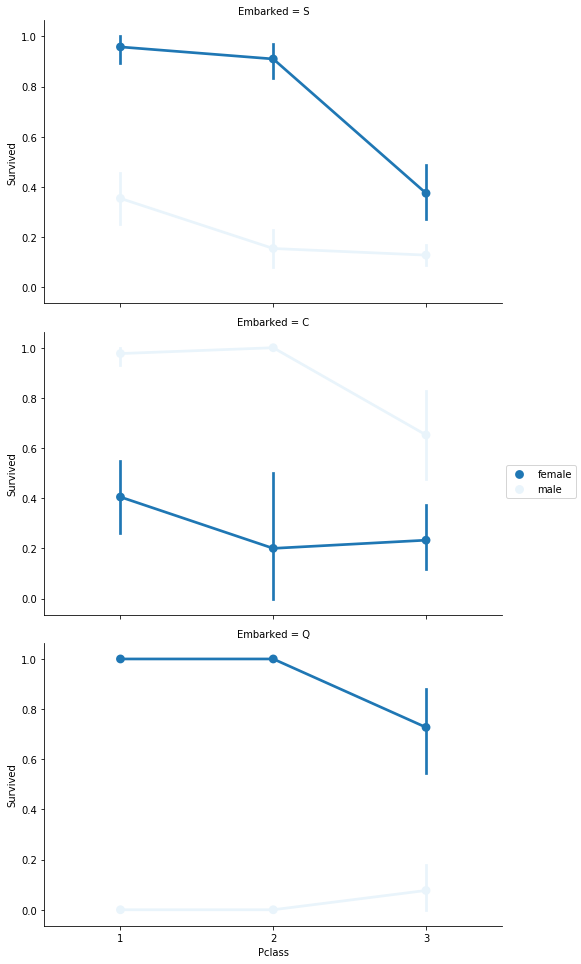

In [10]:
# Embarked, Pclass, Sex against target Survived
# FacetGrid

FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()


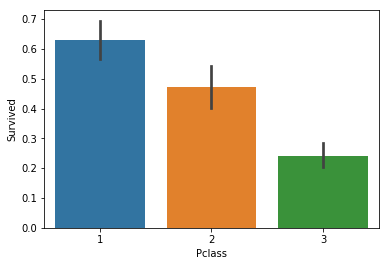

In [11]:
# Bar chart for Pclass

sns.barplot(x='Pclass', y='Survived', data=train_df)

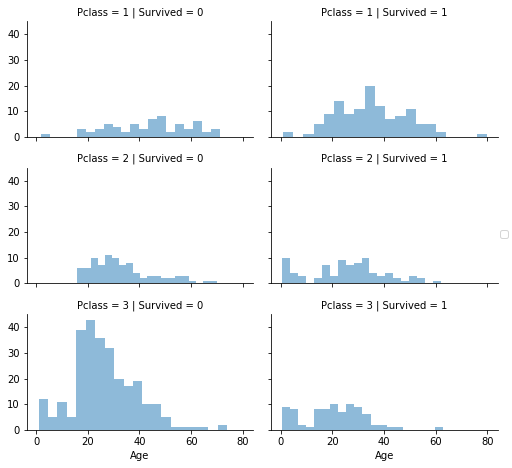

In [12]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();


In [15]:
# Combining features - feature engineering - combine SibSp and Parch to form new variable 'relatives'
# Create a new variable and call it 'alone'
# Criteria - relatives is greater than 0 you are not alone and equal to 0 and you are alone

data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'alone'] = 1
    dataset['alone'] = dataset['alone'].astype(int)
    

In [17]:
train_df['alone'].value_counts()


1    537
0    354
Name: alone, dtype: int64

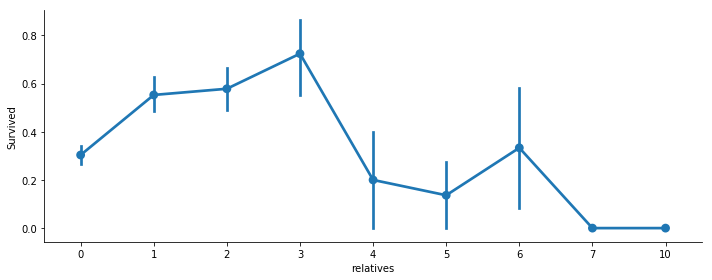

In [18]:
axes = sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, )


In [19]:
# Drop unnecessary features

train_df = train_df.drop(['PassengerId'], axis=1)


In [20]:
# Regular Expression Operations (re) module
# Convert letters from the Cabin to numeric and call it Deck
# Cabin number looks like: 'C123'
# Dict with key-value pairs

import re
# 
deck = {"U": 1, "C": 2, "B": 3, "D": 4, "E": 5, "F": 6, "A": 7, "G": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 
    

In [21]:
# We can now drop the Cabin variable

train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)


### Missing Data

In [113]:
# Tackle missing values for Age variable

data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
# Fill NaNs with the mean value
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = mean
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
    

In [24]:
# Take a look at the variable Embarked

train_df['Embarked'].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [25]:
# Fill missing values or NaNs with most common value 'S' for Embarked 

common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
    

### Convert Variables to Integers 

In [30]:
# Convert Fare from float64 to int64 using 'astype'() function

data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
    

In [56]:
# Basically use Name feature to extract the Titles from the Name and create new feature from this
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # Extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # Replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # Fill NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)


In [57]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)


In [36]:
# Convert Sex feature or variable into numeric

genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
    

In [40]:
# Take a look at Ticket variable

train_df['Ticket'].describe()


count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [41]:
# Drop Ticket from the dataset since there are 681 unique tickets

train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)


In [42]:
# Convert Embarked feature to numeric
# Dict and key-value pairs

ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    

### Creating Categories or Groups

In [44]:
# Create a new 'AgeGroup' variable, categorizing every age into a group
# Establish cut-off points for the groups

data = [train_df, test_df]
for dataset in data:
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 22), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 33), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 44), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 44) & (dataset['Age'] <= 55), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 55) & (dataset['Age'] <= 66), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
    

In [46]:
train_df['Age'].value_counts()


2    293
1    224
3    191
4     76
0     68
5     32
6      7
Name: Age, dtype: int64

In [47]:
train_df.head(10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,alone,Deck,Title
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7,0,1,0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,71,1,1,0,2,3
2,1,3,"Heikkinen, Miss. Laina",1,2,0,0,7,0,0,1,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3,1,0,53,0,1,0,2,3
4,0,3,"Allen, Mr. William Henry",0,3,0,0,8,0,0,1,1,1
5,0,3,"Moran, Mr. James",0,1,0,0,8,2,0,1,1,1
6,0,1,"McCarthy, Mr. Timothy J",0,4,0,0,51,0,0,1,5,1
7,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,21,0,4,0,1,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2,0,2,11,0,2,0,1,3
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,1,0,30,1,1,0,1,3


In [49]:
# qcut() function to help figure out categories for the variable Fare
# Call new variable 'FareBand' with 6 categories or groupings 
# Configuration of groupings handled by the built-in function

train_df['Fare'] = train_df['Fare'].astype(int)
train_df['FareBand'] = pd.qcut(train_df['Fare'], 6)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.0]",0.215768
1,"(7.0, 8.0]",0.142857
2,"(8.0, 14.0]",0.356164
3,"(14.0, 26.0]",0.484848
4,"(26.0, 52.0]",0.382114
5,"(52.0, 512.0]",0.691781


In [50]:
train_df = train_df.drop(['FareBand'], axis=1)
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
    

### Creating new Features

In [51]:
# Age * Class

data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']
    

In [52]:
# Fare per Person

for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)



In [53]:
# Let's take a last look at the training set, before we start training the models

train_df.head(20)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,0,0,1,0,1,1,3,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,3,1,1,0,2,3,3,1
2,1,3,"Heikkinen, Miss. Laina",1,2,0,0,0,0,0,1,1,2,6,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3,1,0,3,0,1,0,2,3,3,1
4,0,3,"Allen, Mr. William Henry",0,3,0,0,1,0,0,1,1,1,9,1
5,0,3,"Moran, Mr. James",0,1,0,0,1,2,0,1,1,1,3,1
6,0,1,"McCarthy, Mr. Timothy J",0,4,0,0,3,0,0,1,5,1,4,3
7,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,2,0,4,0,1,4,0,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2,0,2,1,0,2,0,1,3,6,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,1,0,2,1,1,0,1,3,2,1


### Building Machine Learning Models

In [60]:
# Drop the target variable Survived 
# Make a copy of the test set once we drop PassengerId

X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()



In [62]:
# Stochastic Gradient Descent (SGD) model

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

print(round(acc_sgd,2,), "%")


78.34 %


In [64]:
# Random Forest model

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

print(round(acc_random_forest,2,), "%")



91.69 %


In [65]:
# Logistic Regression model

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

acc_log = round(log_reg.score(X_train, y_train) * 100, 2)

print(round(acc_log,2,), "%")


81.48 %


In [66]:
# KNN model model

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)

print(round(acc_knn,2,), "%")


86.08 %


In [67]:
# Gaussian Naive Bayes model

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

print(round(acc_gaussian,2,), "%")



78.56 %


In [68]:
# Linear SVC model

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

print(round(acc_linear_svc,2,), "%")


81.37 %


In [69]:
# Decision Tree model

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

print(round(acc_decision_tree,2,), "%")


91.69 %


### Which is the Best Model?

In [74]:
# Sort based on score

results = pd.DataFrame({
    'Model': ['Support Vector Machine', 'KNN', 'Logistic Regression',
             'Random Forest', 'Naive Bayes', 'Decision Tree', 
              'Stochastic Gradient Descent'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree, 
             acc_sgd]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
print (result_df.head(7))


                             Model
Score                             
91.69                Random Forest
91.69                Decision Tree
86.08                          KNN
81.48          Logistic Regression
81.37       Support Vector Machine
78.56                  Naive Bayes
78.34  Stochastic Gradient Descent


It appears that the Random Forest classifier performed the best out of the algorithms.

### K-Fold Cross Validation

Remember that k-fold CV randomly splits the set of observations into k groups, or folds, of approximately equal size.  First fold is treated as a validation set, and the method is fit on the remaining k-1 folds.  Let's imagine we split our data into 4 equal folds (K=4).  Our Random Forest model would be trained and evaluated 4 times, using a different fold for evaluation each time, while it would be trained on the remaining 3 folds (4-1).  K-fold Cross Validation repeats this process until every fold acted once as an evaluation fold.

In [84]:
# Perform CV using 10 k=10 folds

from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring="accuracy")


In [85]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [ 0.77777778  0.81111111  0.76404494  0.83146067  0.86516854  0.84269663
  0.83146067  0.7752809   0.85393258  0.84090909]
Mean: 0.819384292362
Standard Deviation: 0.0337569876294


This looks much more realistic than before. Our model has a average accuracy of 82% with a standard deviation of 4%. The standard deviation shows us, how precise the estimates are.
This means in our case that the accuracy of our model can differ + - 4%.

The random-forest algorithm introduces extra randomness when it is growing the trees, instead of searching for the best feature while splitting a node, it searches for the best feature among random subset of features. This process is resulting in a greater diversity, which trades in a higher bias for a lower variance, generally yielding an overall better model.

To say it in simple words: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction, like you can see in the picture below.

### Feature Importance

In [86]:
importances = pd.DataFrame({'feature':X_train.columns, 'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')


In [87]:
importances.head(15)


,importance
feature,
Sex,0.200
Title,0.172
Deck,0.091
Age_Class,0.084
Pclass,0.079
Fare,0.071
Age,0.062
relatives,0.060
Embarked,0.058


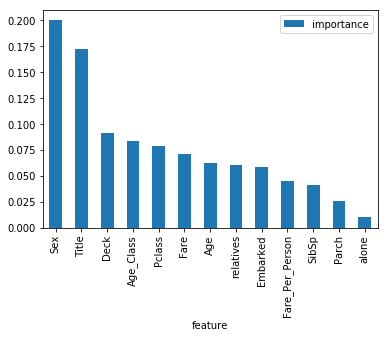

In [90]:
# Plot the important features

importances.plot.bar()


### Conclusion

Alone and Parch doesn't play a significant role in our random forest classifiers prediction process. Because of that I will drop them from the dataset and train the classifier again. We could also remove more or less features, but this would need a more detailed investigation of the features effect on our model. But I think it's just fine to remove only Alone and Parch.

In [91]:
# Drop unnecessary features from our model

train_df = train_df.drop("alone", axis=1)
test_df = test_df.drop("alone", axis=1)

train_df = train_df.drop("Parch", axis=1)
test_df = test_df.drop("Parch", axis=1)


### Re-training Random Forest Model

In [92]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score=True)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100,2)
print(round(acc_random_forest,2,), "%")


91.69 %


In [94]:
# Out-of-bag samples Score

print("oob score:", round(random_forest.oob_score_,4) * 100, "%")


oob score: 81.48 %


### Hyperparameter Tuning

Below you can see the code of the hyperparamter tuning for the parameters criterion, min_samples_leaf, min_samples_split and n_estimators.

In [ ]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

clf.fit(X_train, y_train)

clf.bestparams

In [97]:
# Test new parameters

random_forest = RandomForestClassifier(criterion = "gini",
                                      min_samples_leaf = 1,
                                      min_samples_split = 10,
                                      n_estimators = 100,
                                      max_features='auto',
                                      oob_score=True,
                                      random_state=1,
                                      n_jobs=-1)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

print("oob score:", round(random_forest.oob_score_,4)*100, "%")


oob score: 81.93 %


### Further Evaluation

### Confusion Matrix

In [98]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)


array([[486,  63],
       [ 95, 247]])

The first row is about the not-survived-predictions: 493 passengers were correctly classified as not survived (called true negatives) and 56 where wrongly classified as not survived (false positives).

The second row is about the survived-predictions: 93 passengers where wrongly classified as survived (false negatives) and 249 where correctly classified as survived (true positives).

### Precision & Recall

In [99]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:", recall_score(y_train, predictions))


Precision: 0.796774193548
Recall: 0.722222222222


Our model predicts 80% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 72 % of the people who actually survived.

### F1-Score

In [100]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)


0.75766871165644178

There we have it, a 76% F1-score. The score is not that high, because we have a recall of 72%.  This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff. 

### Precision Recall Curve

To better understand what part a threshold plays, we will look at how the Random Forest classifier makes it's classification decisions. For each person a Random Forest has to classify, it computes a probability based on a function and it classifies the person as survived (when the score is bigger the than threshold) or as not survived (when the score is smaller than the threshold).

In [101]:
from sklearn.metrics import precision_recall_curve

# Getting probabilities of our predictions

y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)


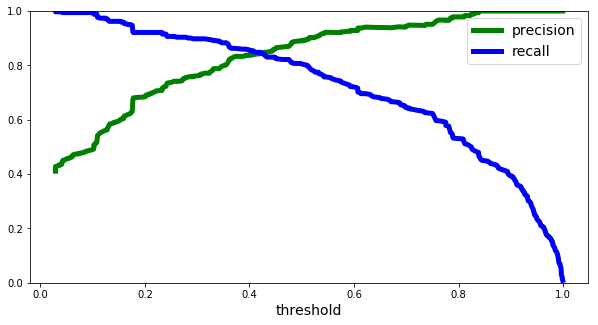

In [109]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "g", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=14)
    plt.legend(loc="upper right", fontsize=14)
    plt.ylim([0, 1])

plt.figure(figsize=(10, 5))
plot_precision_and_recall(precision, recall, threshold)
plt.show()


Above you can clearly see that the recall is falling off sharply at a precision of around 85%. Therefore you probably want to choose to select the precision/recall tradeoff before that - maybe at around 75%.

### ROC AUC Curve

In [105]:
from sklearn.metrics import roc_curve
# Compute true positives and false positives rate

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)


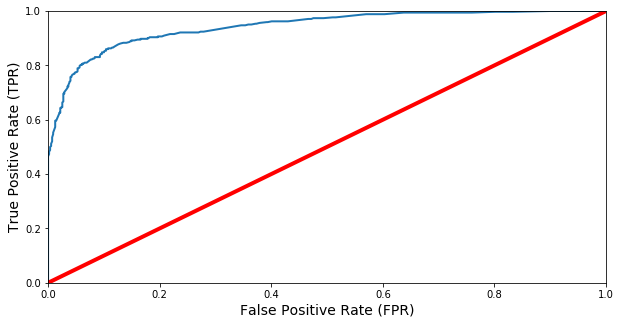

In [110]:
# Plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=14)
    plt.ylabel('True Positive Rate (TPR)', fontsize=14)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()


The red line in the middle is a purely random classifier and therefore your classifier should be as far away from it as possible. Our Random Forest model seems to do a good job.

Of course we also have a tradeoff here, because the classifier produces more false positives, the higher the true positive rate is.

In [115]:
# ROC AUC Score

from sklearn.metrics import roc_auc_score

r_a_score = roc_auc_score(y_train, y_scores)

print("ROC-AUC-Score:", r_a_score)


ROC-AUC-Score: 0.942314042544


**Credit goes to those involved in the Kaggle Titanic Dataset competition for providing this great example of an end-to-end ML project!**